# Project for Bootcamp NYU
Data gathering, cleansing, preprocessing, and maching learning analytics
I use Kaggle repositories to get training and testing set, for this project I use Titanic Project (https://www.kaggle.com/competitions/titanic)

Purpose =  use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

for more information please refer to Readme File

In [21]:
#import library for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# import sklearn machine learning packages:

# LabelEncoder converts string data to numeric:
from sklearn.preprocessing import LabelEncoder

# normalize the data (get all values down to mean=0
# and all other values are standard deviation
# 95% of all values go in the +-2 std (-2 to 2)
from sklearn.preprocessing import StandardScaler

# for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# import RandomForestClassifier for training model
from sklearn.ensemble import RandomForestClassifier

# import confusion matrix for quantifying model's accuracy
# as TP, TN, FP, FN
from sklearn.metrics import confusion_matrix

In [22]:
# load titanic dataset from within seaborn (no csv file)
titanic_df = sns.load_dataset('titanic')
print(titanic_df.shape) # (891, 15)
titanic_df.head(2)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [23]:
# load the train_titanic.csv file provided by Kaggle
tk_df = pd.read_csv('../data/train_titanic.csv')
print(tk_df.shape) # (891, 12)
tk_df.head(2)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Based on 

In [24]:
titanic_df.describe()
tk_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# get info about the df:
tk_df.isna().sum()

#there are a lot of missing values in the dataset
# we will drop the Cabin column and the rows with missing Age values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# print column names for both for comparing:
print('seaborn columns:\n', list(titanic_df.columns))
print('\nkaggle columns:\n', list(tk_df.columns))

# the seaborn data has a lot of redundant columns
# if we know gender and age, we can infer man/woman/child

seaborn columns:
 ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

kaggle columns:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [27]:
# print a few cols unique values to see overlapping and redundancy:
print(titanic_df['who'].unique())
print(titanic_df['sex'].unique())
print(titanic_df['embarked'].unique())
print(titanic_df['embark_town'].unique())

['man' 'woman' 'child']
['male' 'female']
['S' 'C' 'Q' nan]
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [28]:
# view statistical data for the numeric columns (SEABORN)
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
# view statistical data for the numeric columns (KAGGLE)
tk_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# get info about the df from Kaggle:
tk_df.isna().sum()
# we are missing a lot of ages and almost all Cabin values are null
# the move is to drop Cabin column altogether and drop missing Age rows


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# drop the Cabin column:
tk_df.drop(columns=['Cabin'],inplace=True)

In [32]:
# view the shape and first few rows of the df from Kaggle after we drop Cabin Column
print(tk_df.shape) # (891, 11)
tk_df.head(3)

(891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [33]:
# make a new new column for titanic kaggle called "who"
# set it equal to the "who" col from other titanic_df
# this way, we can know if the person is a child
# which is useful for filling missing ages w more accurate age
tk_df['who'] = titanic_df['who']

In [34]:
#check the results
print(tk_df.shape)
tk_df.head(2)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,woman


In [35]:
# calculate the mean age of the adults and the children
man_df = tk_df[ tk_df['who'] == 'man' ]
man_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,man
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,man


In [36]:
print("mean age for men")
mean_man_age = round(tk_df[ tk_df['who'] == 'man' ]['Age'].mean(),1)
print(mean_man_age)

print("mean age for women")
mean_woman_age = round(tk_df[ tk_df['who'] == 'woman' ]['Age'].mean(),1)
print(mean_woman_age)

print("mean age for children")
mean_child_age = round(tk_df[ tk_df['who'] == 'child' ]['Age'].mean(),1)
print(mean_child_age)


mean age for men
33.2
mean age for women
32.0
mean age for children
6.4


In [37]:
# fill the 2 missing Embarked with the most common value, which is "S"
# add inplace=True if you don't want to save the changed df to itself
tk_df['Embarked'].fillna('S',inplace=True)

/var/folders/5d/87kx7_3555x_7x12423nl75w0000gn/T/ipykernel_2413/3441208570.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tk_df['Embarked'].fillna('S',inplace=True)


In [38]:
#check the database who already has Embarked Value (fill with most common value)
tk_df.isna().sum()

#after this we need to fill the age column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
who              0
dtype: int64

In [39]:
# fill the 177 missing ages with the correct mean age
# call apply lambda on the WHOLE df, since we need access to 2 different columns
# set the lamdba expression equal to row to capture the return value, row by row
tk_df['Age'] = tk_df.apply(lambda row : 33.2 if pd.isna(row['Age']) and row['who']=='man'
                           else 32.0 if pd.isna(row['Age']) and row['who']=='woman'
                           else 6.4 if pd.isna(row['Age']) and row['who']=='child'
                           else row['Age'], axis=1)

In [40]:
#check the database who already has Age Value (fill with Mean)
tk_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
who            0
dtype: int64

In [41]:
#check the data
tk_df.sample(20)

#goal = we want to predict the survived column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,S,child
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,33.20,0,0,113767,50.0000,S,man
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.00,1,1,347054,10.4625,S,woman
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.00,2,0,3101277,7.9250,S,man
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.00,0,0,13213,35.5000,C,man
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,C,man
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.00,1,1,17421,110.8833,C,woman
732,733,0,2,"Knight, Mr. Robert J",male,33.20,0,0,239855,0.0000,S,man
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,C,man
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.00,1,0,19996,52.0000,S,man


In [42]:
# 'perished / survived' ratio of full 891 rows
# 549 / 342 (61.61% of the 891 did not survive)
# get the 'perished / survived' ratio (value_counts) for the 891 rows
tk_df['Survived'].value_counts() # 59.55% of 891 did not survive

Survived
0    549
1    342
Name: count, dtype: int64

In [43]:
# get the breakdown of the 3 passenger classes
tk_df['Pclass'].value_counts()
# 'Pclass'

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [44]:
tk_df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [45]:
# get a break down of passengers by class
pclass_counts_df = pd.DataFrame(tk_df.groupby('Pclass')['Survived'].count())
pclass_counts_df #how many passengers were in each class


,Survived
Pclass,
1,216
2,184
3,491


In [46]:
# change the column with the value counts to 'count'
pclass_counts_df.rename(columns={'Survived':'Count'}, inplace=True)
pclass_counts_df

,Count
Pclass,
1,216
2,184
3,491


In [47]:
# do a groupby to get survival rates by sex
# 'Sex' 'Survived'
survial_rate_by_sex = tk_df.groupby('Sex')[['Survived']].mean()
print(type(survial_rate_by_sex), survial_rate_by_sex.shape)
survial_rate_by_sex

<class 'pandas.core.frame.DataFrame'> (2, 1)


,Survived
Sex,
female,0.742038
male,0.188908


In [48]:
# do a groupby to get survival totals by sex
count_by_sex = tk_df.groupby('Sex')[['Survived']].count()
count_by_sex.rename(columns={'Survived':'Count'},inplace=True)
print(type(count_by_sex), count_by_sex.shape)
count_by_sex

<class 'pandas.core.frame.DataFrame'> (2, 1)


,Count
Sex,
female,314
male,577


In [49]:
# 'Sex' 'Pclass' 'Survived'
# 'Survived' 'Count'
pclass_by_sex_df = tk_df.groupby(['Sex','Pclass'])[['Age']].count()
pclass_by_sex_df.rename(columns={'Age':'Count'},inplace=True)
pclass_by_sex_df

Count
Sex    Pclass       
female 1          94
       2          76
       3         144
male   1         122
       2         108
       3         347

In [50]:
# 'Sex' 'Pclass' 'Embarked' 'Survived'
# 'Survived' 'Count'
pclass_by_sex_and_embark_df = tk_df.groupby(['Sex','Pclass','Embarked'])[['Age']].count()
pclass_by_sex_and_embark_df.rename(columns={'Age':'Count'},inplace=True)
pclass_by_sex_and_embark_df

Count
Sex    Pclass Embarked       
female 1      C            43
              Q             1
              S            50
       2      C             7
              Q             2
              S            67
       3      C            23
              Q            33
              S            88
male   1      C            42
              Q             1
              S            79
       2      C            10
              Q             1
              S            97
       3      C            43
              Q            39
              S           265

In [51]:
# if 'survived' is actually showing total number of passengers
# how can we break down the triple group by survival?
# add a 4th item to group by list: 'survived'
# 'survived', 'sex', 'pclass', 'embarked'
survived_pclass_embark_sex_df = tk_df.groupby(['Survived', 'Sex', 'Pclass', 'Embarked'])[['Survived']].count()


In [52]:
#check the data of survival status by sex, pclass, and embarked
survived_pclass_embark_sex_df

Survived
Survived Sex    Pclass Embarked          
0        female 1      C                1
                       S                2
                2      S                6
                3      C                8
                       Q                9
                       S               55
         male   1      C               25
                       Q                1
                       S               51
                2      C                8
                       Q                1
                       S               82
                3      C               33
                       Q               36
                       S              231
1        female 1      C               42
                       Q                1
                       S               48
                2      C                7
                       Q                2
                       S               61
                3      C               15
                       Q               24
                       S               33
         male   1      C               17
                       S               28
                2      C                2
                       S               15
                3      C               10
                       Q                3
                       S               34

In [53]:
# do a groupby to get survival totals by sex
survived_or_not_df = tk_df.groupby('Survived')[['Survived']].count()
survived_or_not_df.rename(columns={'Survived':'Count'},inplace=True)
survived_or_not_df

,Count
Survived,
0,549
1,342


1 <class 'list'>


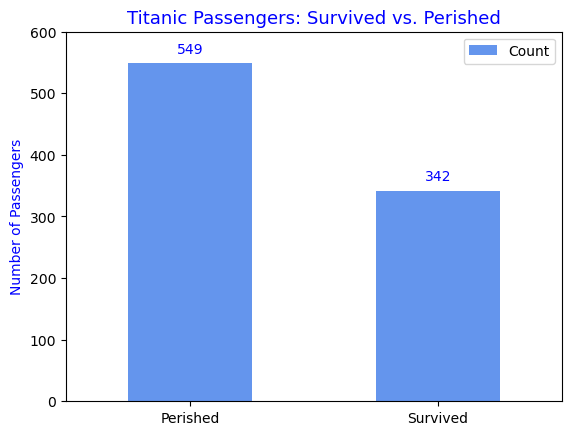

In [54]:
# plot survived_counts_df by calling plot() on the survived_or_not_df dataframe
# set plot equal to ax so that we can show bar values
ax = survived_or_not_df.plot(kind='bar', color='cornflowerblue')

plt.title('Titanic Passengers: Survived vs. Perished', color='blue', fontsize=13)
plt.xlabel('')
plt.ylabel('Number of Passengers', color='blue')
plt.xticks(rotation=0)
# Label the bars with their counts: hint requires that ax variable as
# well as a for loop
plt.ylim(0,600)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)

# for bar in ax.containers:
#   ax.bar_label(bar, padding=5, color="coral")
ax.bar_label(ax.containers[0], padding=5, color="blue")
print(len(ax.containers), type(ax.containers))
plt.show()

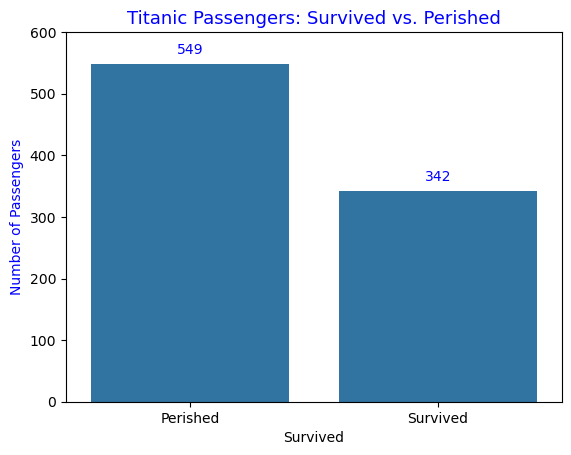

In [55]:
# make a seaborn countplot showing survived vs perished
# one bar per category of the 'survived' column;
# bar height is the count of that category
ax = sns.countplot(x='Survived', data=tk_df)

plt.title('Titanic Passengers: Survived vs. Perished', color='blue',fontsize=13)
plt.ylim(0,600)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)
plt.ylabel('Number of Passengers', color='blue')

# show values above bars
ax.bar_label(ax.containers[0], padding=5, color="blue")

plt.show()

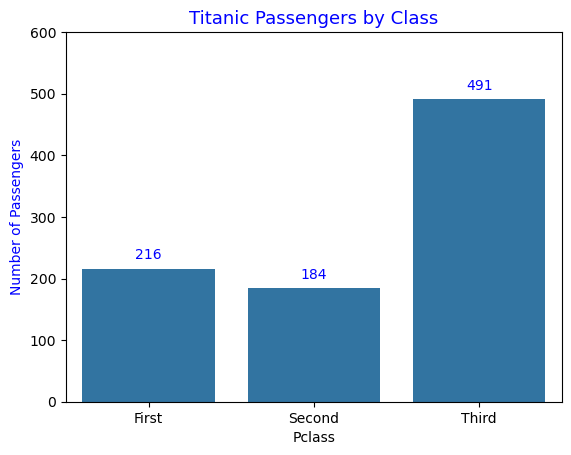

In [56]:
# make a seaborn countplot counts of each passenger class
ax = sns.countplot(x='Pclass', data=tk_df)

plt.title('Titanic Passengers by Class', color='blue',fontsize=13)
plt.ylim(0,600)
plt.xticks(ticks=[0,1,2],labels=['First','Second','Third'],rotation=0)
plt.ylabel('Number of Passengers', color='blue')

# show values above bars

ax.bar_label(ax.containers[0], padding=5, color="blue")

plt.show()

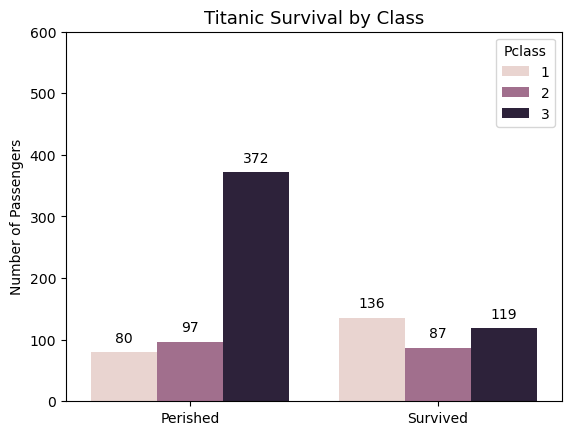

In [57]:
# make a seaborn countplot counts of each passenger class
ax = sns.countplot(x='Survived', hue='Pclass', data=tk_df)

plt.title('Titanic Survival by Class', color='black',fontsize=13)
plt.ylim(0,600)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)
plt.ylabel('Number of Passengers', color='black')
plt.xlabel('')
# show values above bars
for bar in ax.containers:
  ax.bar_label(bar, padding=5, color="black")
# ax.bar_label(ax.containers[0], padding=5, color="coral")

plt.show()

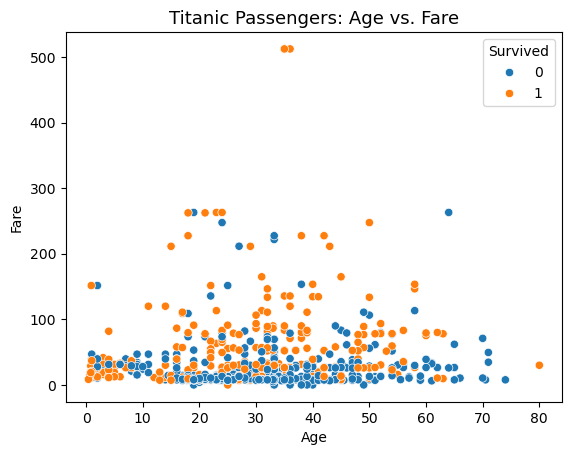

In [58]:
#create scatterplot for the dataset
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=tk_df)
plt.title('Titanic Passengers: Age vs. Fare', color='black', fontsize=13)
plt.xlabel('Age', color='black')
plt.ylabel('Fare', color='black')
plt.show()

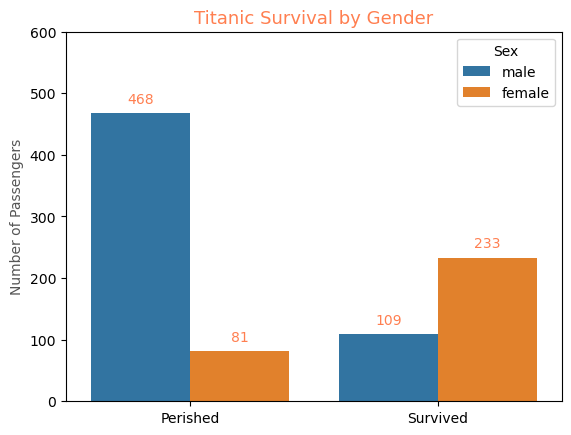

In [59]:
# divide survived vs perished by sex
# 'Survived' 'Sex'
ax = sns.countplot(x='Survived', hue='Sex', data=tk_df)

plt.title('Titanic Survival by Gender', color='coral',fontsize=13)
plt.ylim(0,600)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)
plt.ylabel('Number of Passengers', color='#555')
plt.xlabel('')
# show values above bars
for bar in ax.containers:
  ax.bar_label(bar, padding=5, color="coral")
# ax.bar_label(ax.containers[0], padding=5, color="coral")

plt.show()
# Findings =  More than half the passengers who embarked at Cherbourg survived
# vs. 2/3 of the passengers who got on at Southampton perished

In [60]:
# make a new column that has as its value a concatenates string of Pclass and Sex
order = ['1_female', '1_male', '2_female', '2_male', '3_female', '3_male']
tk_df['Pclass_Sex'] = tk_df['Pclass'].astype(str) + '_' + tk_df['Sex']
tk_df['Pclass_Sex'] = pd.Categorical(tk_df['Pclass_Sex'], categories=order)

In [61]:
tk_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who,Pclass_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,man,3_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,woman,1_female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,woman,3_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,woman,1_female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,man,3_male


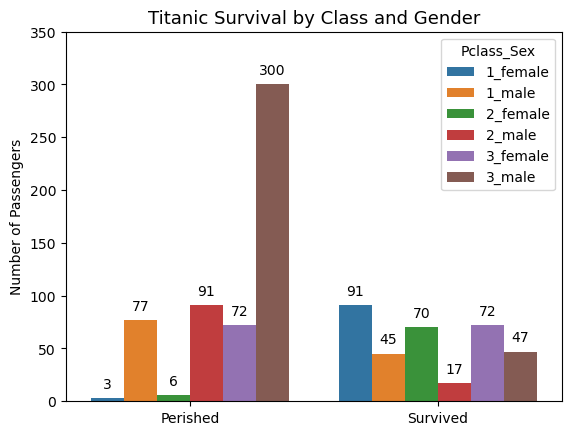

In [62]:
# survived vs perished by pclass AND sex using the new combo col as the hue
# 'Survived' 'Sex'
ax = sns.countplot(x='Survived', hue='Pclass_Sex', data=tk_df)

plt.title('Titanic Survival by Class and Gender', color='black',fontsize=13)
plt.ylim(0,350)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)
plt.ylabel('Number of Passengers', color='black')
plt.xlabel('')
# show values above bars
for bar in ax.containers:
  ax.bar_label(bar, padding=5, color="black")
# ax.bar_label(ax.containers[0], padding=5, color="coral")

plt.show()
# Findings = More than half the passengers who embarked at Cherbourg survived
# vs. 2/3 of the passengers who got on at Southampton perished

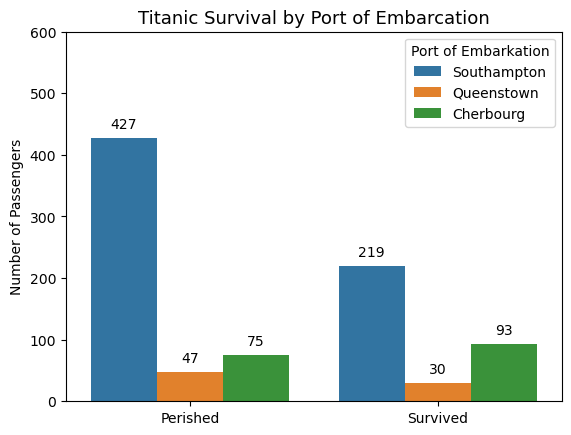

In [63]:
# Plot survival by Embarked Port
# hint: no combo new column necessary, just an x for the main col
# and hue for the secondary column
# label the bars w their values
# divide survived vs perished by sex
# 'Survived' 'Sex'
ax = sns.countplot(x='Survived', hue='Embarked', data=tk_df)

plt.title('Titanic Survival by Port of Embarcation', color='black',fontsize=13)
plt.ylim(0,600)
plt.xticks(ticks=[0,1],labels=['Perished','Survived'],rotation=0)
plt.ylabel('Number of Passengers', color='black')
plt.xlabel('')
# show values above bars
for bar in ax.containers:
  ax.bar_label(bar, padding=5, color="black")
# ax.bar_label(ax.containers[0], padding=5, color="coral")

# rename the legend from S,Q,C to Southampton, Cherbourg, Queenstown
# make a dictonary with current legend labels as keys and new labels as values
# embarked_dict = {'S':'Southampton', 'Q':'Queenstown', 'C':'Cherbourg'}
# get handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()
# replace the labels

# use list comprehension to loop the dict, key by key:
# list comprehension provides a "one-liner" alternative to a loop:
# new_labels = [ embarked_dict[key] for key in labels ]
# new_labels = []
# for key, val in embarked_dict.items():
#   new_labels.append(val)

# or if you just know the new label names:

# update the legend
ax.legend(handles=handles, labels=['Southampton', 'Queenstown', 'Cherbourg'], title="Port of Embarkation")

plt.show()
# Findings = More than half the passengers who embarked at Cherbourg survived
# vs. 2/3 of the passengers who got on at Southampton perished

In [64]:
# make a pivot_table() where sex categories ('male', 'female') are the index values
# columns are passenger class string ('First', 'Second', 'Third') and values are 'survived'
pivoted_df = tk_df.pivot_table(index='Sex', columns='Pclass', values='Survived')
pivoted_df.rename(columns={1:"First",2:"Second",3:"Third"},inplace=True)
# format as pcts: multiply the entire df by 100 -- this is a matrix operation, cuz it's 2D
# as opposed to a vector operation which is math done across all items in a column vector
pivoted_df = round(pivoted_df * 100,2)
pivoted_df

Pclass,First,Second,Third
Sex,,,
female,96.81,92.11,50.00
male,36.89,15.74,13.54


In [ ]:
# pivot table:
# row names are passenger classes (First, Second, Third -- NOT 1,2,3)
# column names are sex
# values are survival pcts
pivoted2_df = tk_df.pivot_table(index='Pclass', columns='Sex', values='Survived')
pivoted_df.rename(index={1:"First",2:"Second",3:"Third"},inplace=True)
pivoted2_df = round(pivoted2_df * 100,2)
pivoted2_df

Sex,female,male
Pclass,,
1,96.81,36.89
2,92.11,15.74
3,50.00,13.54


In [66]:
# 'Embarked' 'Sex' 'Pclass' 'Survived'
pivoted3_df = tk_df.pivot_table(index=['Sex','Embarked'], columns='Pclass', values='Survived')
pivoted3_df.rename(columns={1:"First",2:"Second",3:"Third"},inplace=True)
pivoted3_df = round(pivoted3_df * 100,2)
pivoted3_df

Pclass            First  Second  Third
Sex    Embarked                       
female C          97.67  100.00  65.22
       Q         100.00  100.00  72.73
       S          96.00   91.04  37.50
male   C          40.48   20.00  23.26
       Q           0.00    0.00   7.69
       S          35.44   15.46  12.83

In [67]:
# instantiate a label encoder for converting string data to numeric:
le = LabelEncoder()

In [68]:
# use label_encoder.fit_transform(list_of_string) to convert 'sex' and 'embarked' from strings to ints
tk_df['Sex'] = le.fit_transform(tk_df['Sex'])
tk_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who,Pclass_Sex
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,man,3_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,woman,1_female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,woman,3_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,woman,1_female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,man,3_male


In [ ]:
# label encode 'Embarked' columns: change S C Q into 0,1,2
tk_df['Embarked'] = le.fit_transform(tk_df['Embarked'])
tk_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,who,Pclass_Sex
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,man,3_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,woman,1_female
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,woman,3_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,woman,1_female
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,man,3_male


In [70]:
# SPLIT the DATA into TRAINING INPUTS and TRAINING LABELS
# X is the training inputs, which is all rows and all cols EXCEPT for the survived column
# the training inputs do not contain the survived column, because survived (0,1) is the answer
# that we want the model to be able to learn to predict
# X : titanic_kag_df[['']].va # X is all rows, all cols except 'survived'
# y .il : .va # y is all rows, just first col, so 'survived' col
# 'Pclass', 'Sex', 'Age'
X_train = tk_df[['Pclass','Embarked','Sex','Age','Fare','SibSp','Parch']]

In [71]:
print(X_train.shape)
X_train.head(3)

(891, 7)


,Pclass,Embarked,Sex,Age,Fare,SibSp,Parch
0,3,2,1,22.0,7.2500,1,0
1,1,0,0,38.0,71.2833,1,0
2,3,2,0,26.0,7.9250,0,0


In [72]:
y_train = tk_df['Survived']
print(y_train.shape) # (891,)
y_train[:5]

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [73]:
# instantiate the StandardScaler object:
sc = StandardScaler()

In [74]:
# The y data is already in the form of 0 to 1 only, so
# we only need to scale that -- just scale the X (input) data
# use .loc to specify all rows as : and target cols as list of col names
X_train.loc[:,['Age','Fare']] = sc.fit_transform(X_train.loc[:,['Age','Fare']])

In [75]:
#check the data
X_train.head()

,Pclass,Embarked,Sex,Age,Fare,SibSp,Parch
0,3,2,1,-0.637435,-0.502445,1,0
1,1,0,0,0.587931,0.786845,1,0
2,3,2,0,-0.331094,-0.488854,0,0
3,1,2,0,0.358174,0.420730,1,0
4,3,2,1,0.358174,-0.486337,0,0


In [76]:
# instantiate a RandomForestClassifier model:
forest_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)

In [77]:
forest_model.fit(X_train,y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
# load the test set
tk_test_df = pd.read_csv('../data/test_titanic.csv')

In [79]:
print(tk_test_df.shape)

tk_test_df.head(5)


(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
tk_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [81]:
tk_test_df['Age'].fillna(30,inplace=True)

/var/folders/5d/87kx7_3555x_7x12423nl75w0000gn/T/ipykernel_2413/3763846354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tk_test_df['Age'].fillna(30,inplace=True)


In [82]:
tk_test_df.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
335,1227,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.0000,C106,S
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
297,1189,3,"Samaan, Mr. Hanna",male,30.0,2,0,2662,21.6792,NaN,C
258,1150,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S
313,1205,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,30.0,0,0,SC/PARIS 2159,12.8750,NaN,S
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
189,1081,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,30.0,0,0,112051,0.0000,NaN,S
180,1072,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.0000,NaN,S


In [83]:
# get the avg fare
avg_fare = round(tk_test_df['Fare'].mean(),4)
avg_fare

np.float64(35.6272)

In [84]:
# fill that one and only missing Fare w mean:
tk_test_df['Fare'].fillna(avg_fare,inplace=True)


/var/folders/5d/87kx7_3555x_7x12423nl75w0000gn/T/ipykernel_2413/672619971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tk_test_df['Fare'].fillna(avg_fare,inplace=True)


In [85]:
tk_test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [86]:
X_test = tk_test_df[['Pclass','Embarked','Sex','Age','Fare','SibSp','Parch']]

In [87]:
print(X_test.shape)
X_test.tail()

(418, 7)


,Pclass,Embarked,Sex,Age,Fare,SibSp,Parch
413,3,S,male,30.0,8.0500,0,0
414,1,C,female,39.0,108.9000,0,0
415,3,S,male,38.5,7.2500,0,0
416,3,S,male,30.0,8.0500,0,0
417,3,C,male,30.0,22.3583,1,1


In [88]:
# Label Encode the Emparked and Sex cols -- strings become ints
X_test.loc[:,'Embarked'] = le.fit_transform(X_test.loc[:,'Embarked'])

In [89]:
X_test.loc[:,'Sex'] = le.fit_transform(X_test.loc[:,'Sex'])

In [90]:
X_test.head(3)

,Pclass,Embarked,Sex,Age,Fare,SibSp,Parch
0,3,1,1,34.5,7.8292,0,0
1,3,2,0,47.0,7.0000,1,0
2,2,1,1,62.0,9.6875,0,0


In [91]:
X_test.loc[:,['Age','Fare']] = sc.fit_transform(X_test.loc[:,['Age','Fare']])

In [92]:
X_test.head(3)

,Pclass,Embarked,Sex,Age,Fare,SibSp,Parch
0,3,1,1,0.339424,-0.498407,0,0
1,3,2,0,1.329924,-0.513274,1,0
2,2,1,1,2.518523,-0.465088,0,0


In [93]:
# have the new model predict survival on the kaggle 418 row test set
survival_predictions = forest_model.predict(X_test)

In [94]:
# make a df for our predictions to submit to kaggle
# kaggle requires a csv of 2 cols: PassengerId and Survived
my_titanic_preditions_df = pd.DataFrame()
my_titanic_preditions_df['PassengerId'] = tk_test_df['PassengerId']
my_titanic_preditions_df['Survived'] = survival_predictions

In [95]:
print(my_titanic_preditions_df.shape)
my_titanic_preditions_df.sample(20)

(418, 2)


,PassengerId,Survived
410,1302,0
246,1138,1
202,1094,0
68,960,0
267,1159,0
300,1192,0
220,1112,1
17,909,0
35,927,0
158,1050,0


In [96]:
# save dataframe as csv
# index=False prevents the index, which are ints from 0-417 from becoming a 3rd col
my_titanic_preditions_df.to_csv('../data/my_titanic_kaggle_predictions.csv', encoding='utf-8', index=False)

In [97]:

# load the csv to make sure it worked as expected
my_predictions_df = pd.read_csv('../data/my_titanic_kaggle_predictions.csv')
print(my_predictions_df.shape) # (418, 3) oops -- we got an extra column
my_predictions_df.head()

# Findings = we have an unwanted "Unnamed: 0" column of the old index values

(418, 2)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


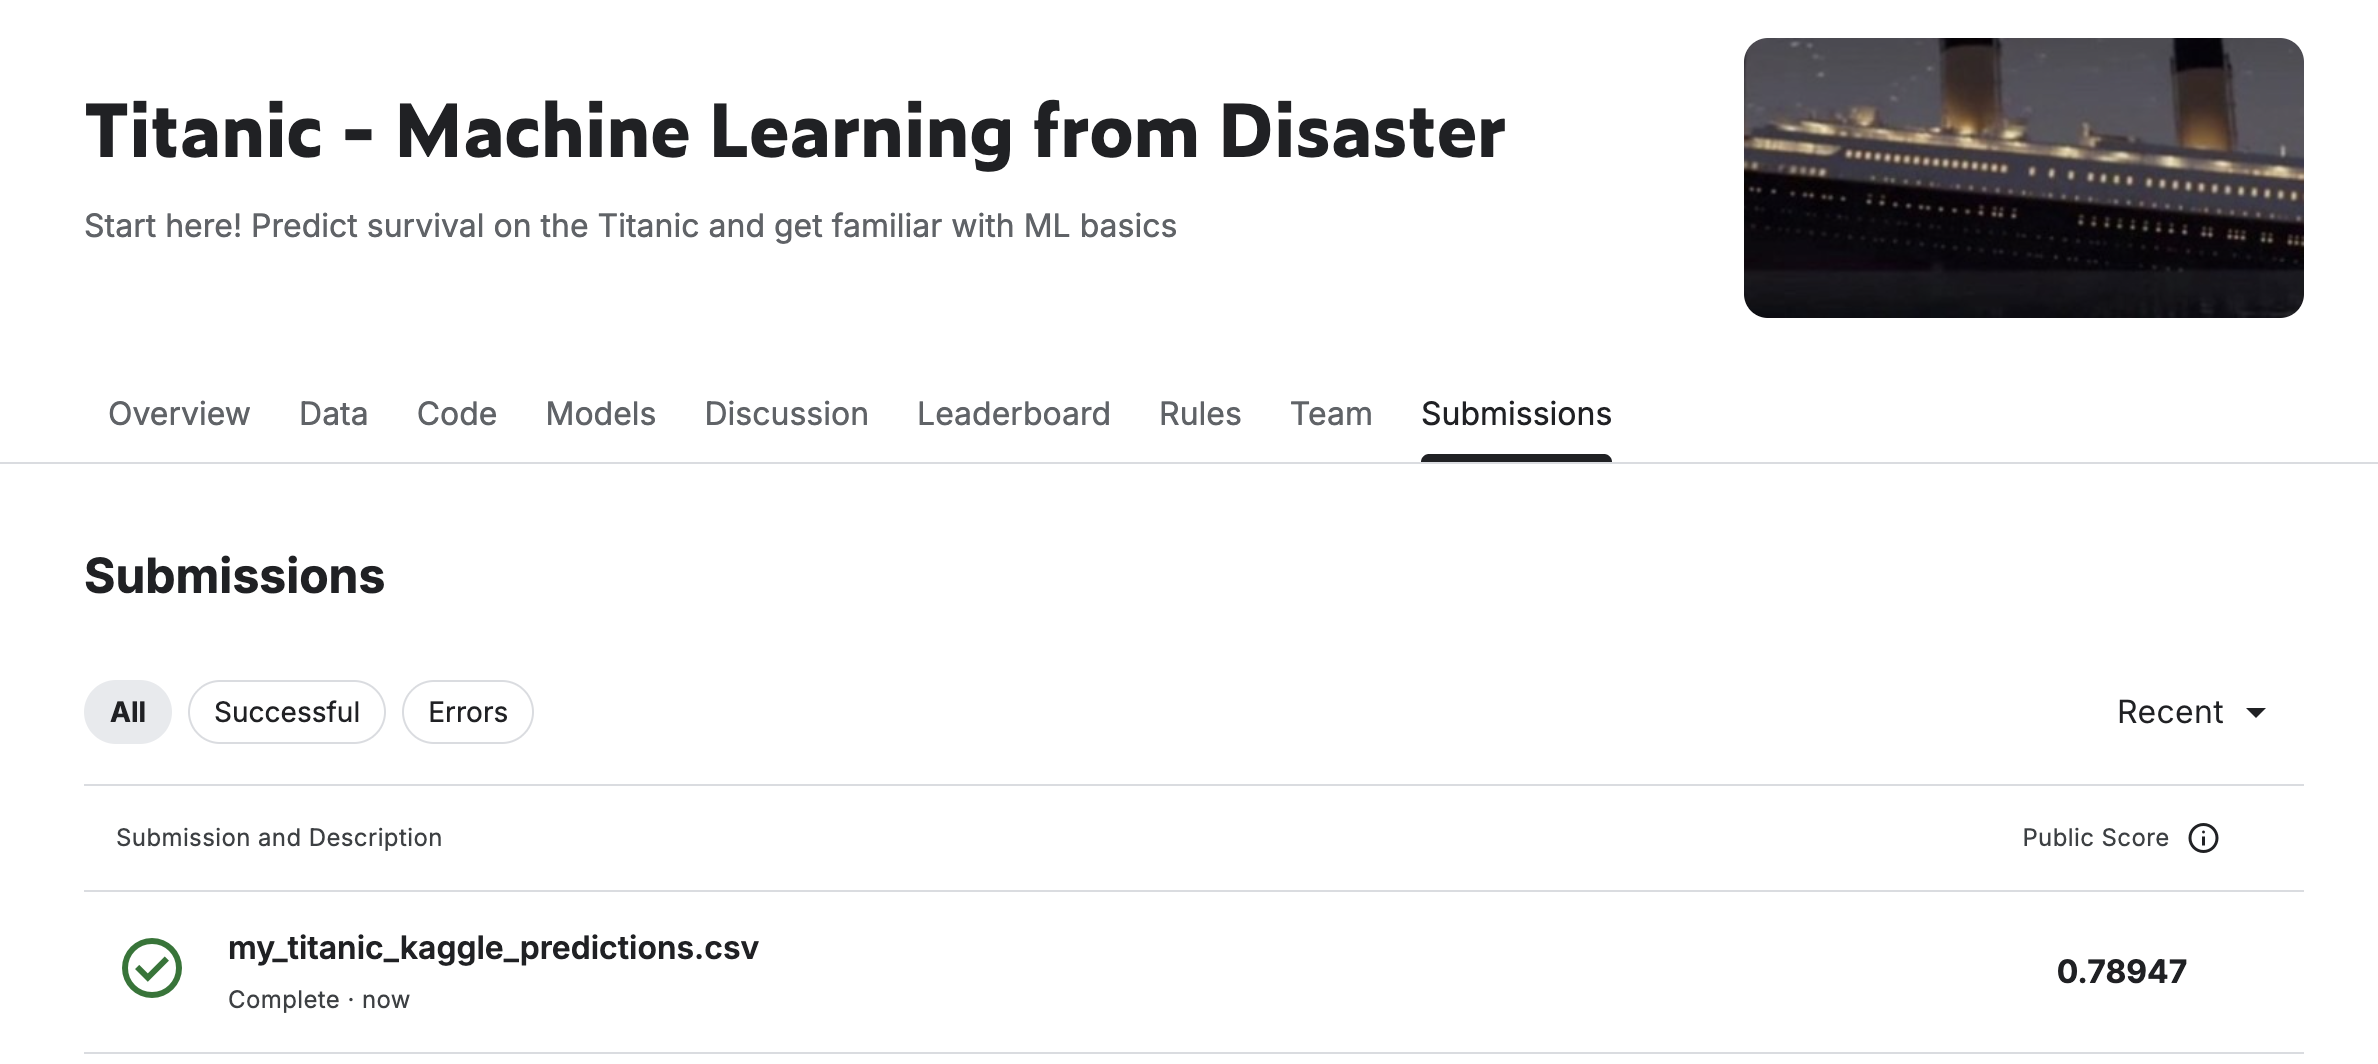

In [ ]:
#submitted the result to Kaggle
#load the image of my submission to Kaggle (I can not print the confusion matrix or accuracy-plot because the real data is stored in Kaggle). My model is 78.9% accurate

Image('../notebooks/Kaggle_Result_Prediction.png')